<a href="https://colab.research.google.com/github/GurgenGulay/Diabetes/blob/main/Diyabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Değişkenler**
*   Pregnancies: Hamilelik sayısı
*   Glucose: Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu
*   Blood Pressure: Kan Basıncı (Küçük tansiyon) (mm Hg)
*   SkinThickness: Cilt Kalınlığı
*   Insulin: 2 saatlik serum insülini (mu U/ml)
*   DiabetesPedigreeFunction: Soydaki kişilere göre diyabet olma ihtimalini hesaplayan bir fonksiyon
*   BMI: Vücut kitle endeksi
*   Age: Yaş (yıl)
*   Outcome: Hastalığa sahip (1) ya da değil (0)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier

pd.set_option('expand_frame_repr', True)
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)

In [ ]:
file_path = '/content/diabetes.csv'
df = pd.read_csv(file_path)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# **Keşifci Veri Analizi**

In [ ]:
def checkDf(dataframe, head = 8):
    print("##### Shape #####")
    print(dataframe.shape)
    print("\n##### Types #####")
    print(dataframe.dtypes)
    print("\n##### Tail #####")
    print(dataframe.tail(head))
    print("\n##### Head #####")
    print(dataframe.head(head))
    print("\n##### Null Analysis #####")
    print(dataframe.isnull().sum())
    print("\n##### Quantiles #####")
    print(dataframe.describe([0, 0.25, 0.50, 0.75, 1]).T)


checkDf(df)

##### Shape #####
(768, 9)

##### Types #####
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

##### Tail #####
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767   

In [ ]:
df.columns = [col.upper() for col in df.columns]


*   Numerik ve kategorik değişkenlerin analizini


In [ ]:
def grabColNames(dataframe, catTh=10, carTh=20):
    # catCols, catButCar
    catCols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numButCat = [col for col in dataframe.columns if dataframe[col].nunique() < catTh and
                 dataframe[col].dtypes != "O"]
    catButCar = [col for col in dataframe.columns if dataframe[col].nunique() > carTh and
                 dataframe[col].dtypes == "O"]
    catCols = catCols + numButCat
    catCols = [col for col in catCols if col not in catButCar]

    # numCols
    numCols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numCols = [col for col in numCols if col not in numButCat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'catCols: {len(catCols)}')
    print(f'numCols: {len(numCols)}')
    print(f'catButCar: {len(catButCar)}')
    print(f'numButCat: {len(numButCat)}')
    return catCols, numCols, catButCar


catCols, numCols, catButCar = grabColNames(df)

Observations: 768
Variables: 9
catCols: 1
numCols: 8
catButCar: 0
numButCat: 1


         OUTCOME      Ratio
OUTCOME                    
0            500  65.104167
1            268  34.895833
##########################################


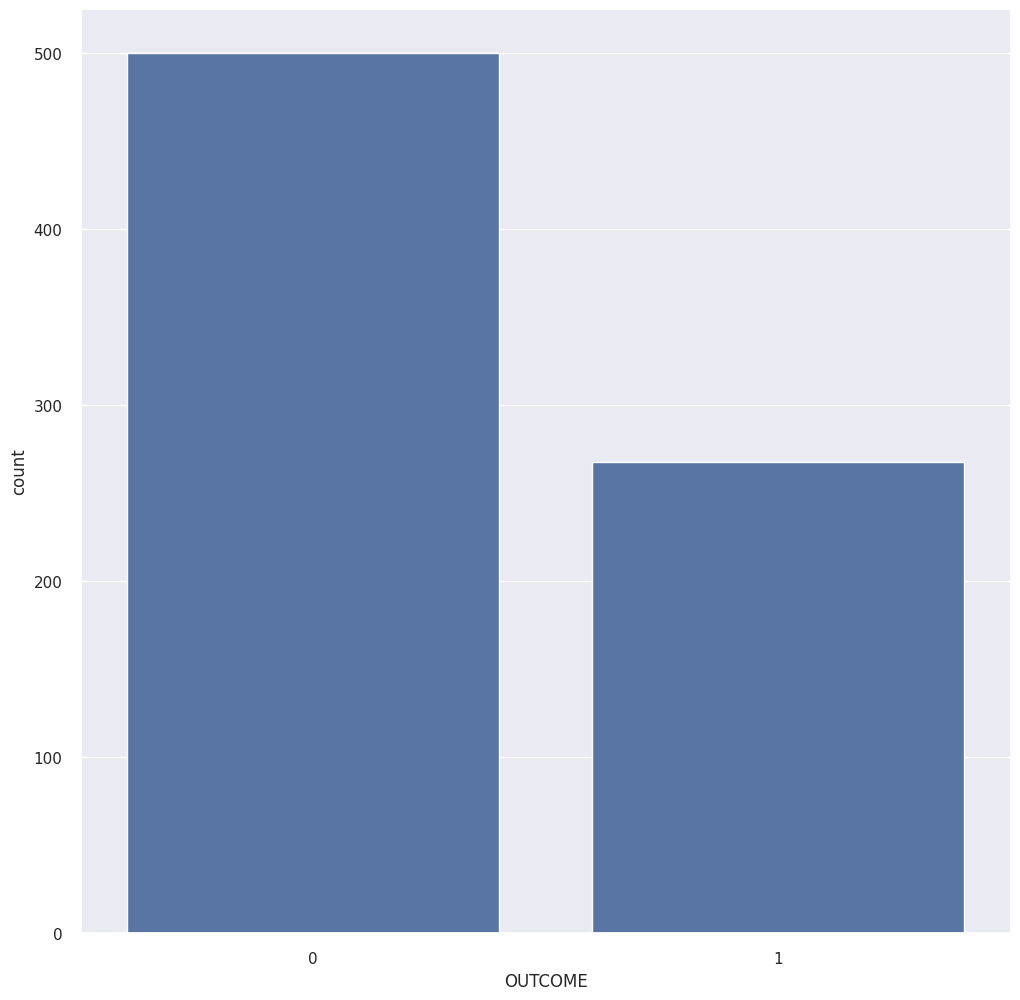

In [ ]:
def catSummary(dataframe, colName, plot=True):
    print(pd.DataFrame({colName: dataframe[colName].value_counts(),
                        "Ratio": 100 * dataframe[colName].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[colName], data=dataframe)
        plt.show(block=True)


catSummary(df, "OUTCOME")

PREGNANCIES:
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
100%      17.000000
max       17.000000
Name: PREGNANCIES, dtype: float64


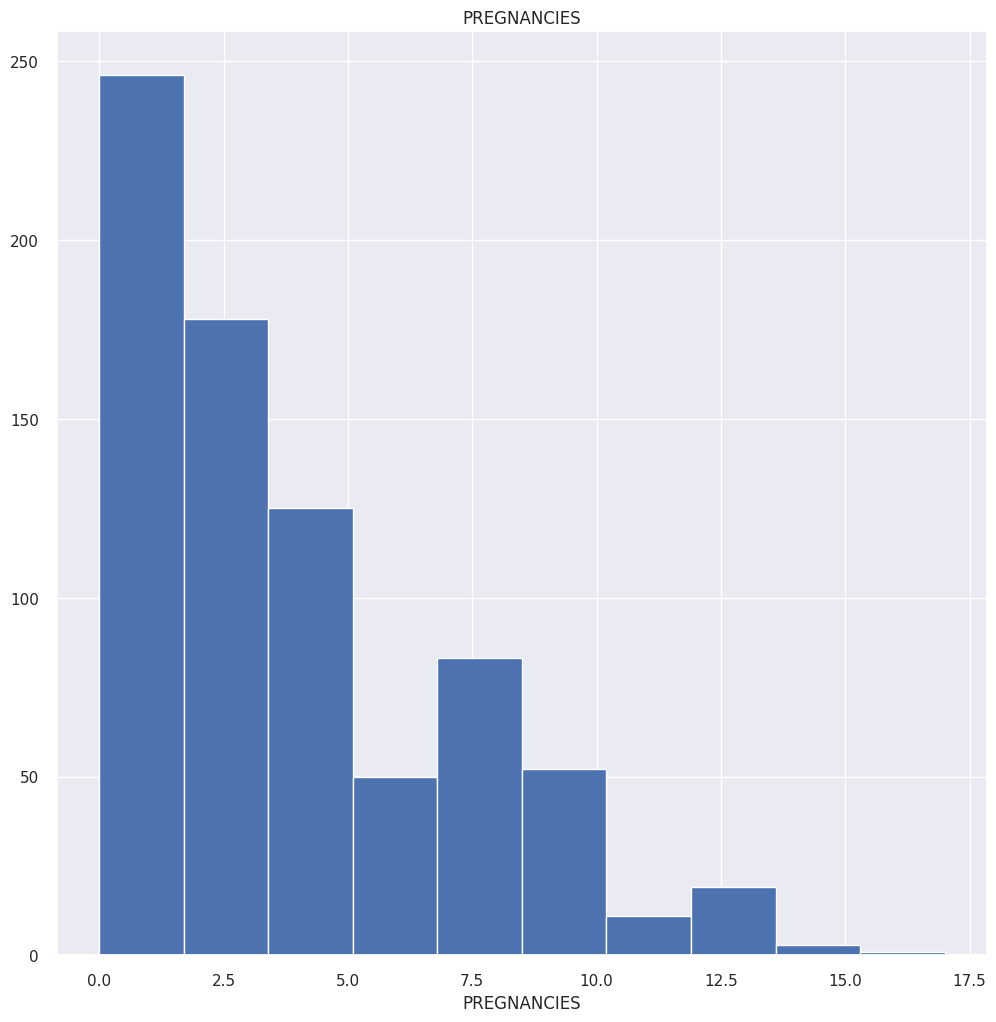

GLUCOSE:
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
100%     199.000000
max      199.000000
Name: GLUCOSE, dtype: float64


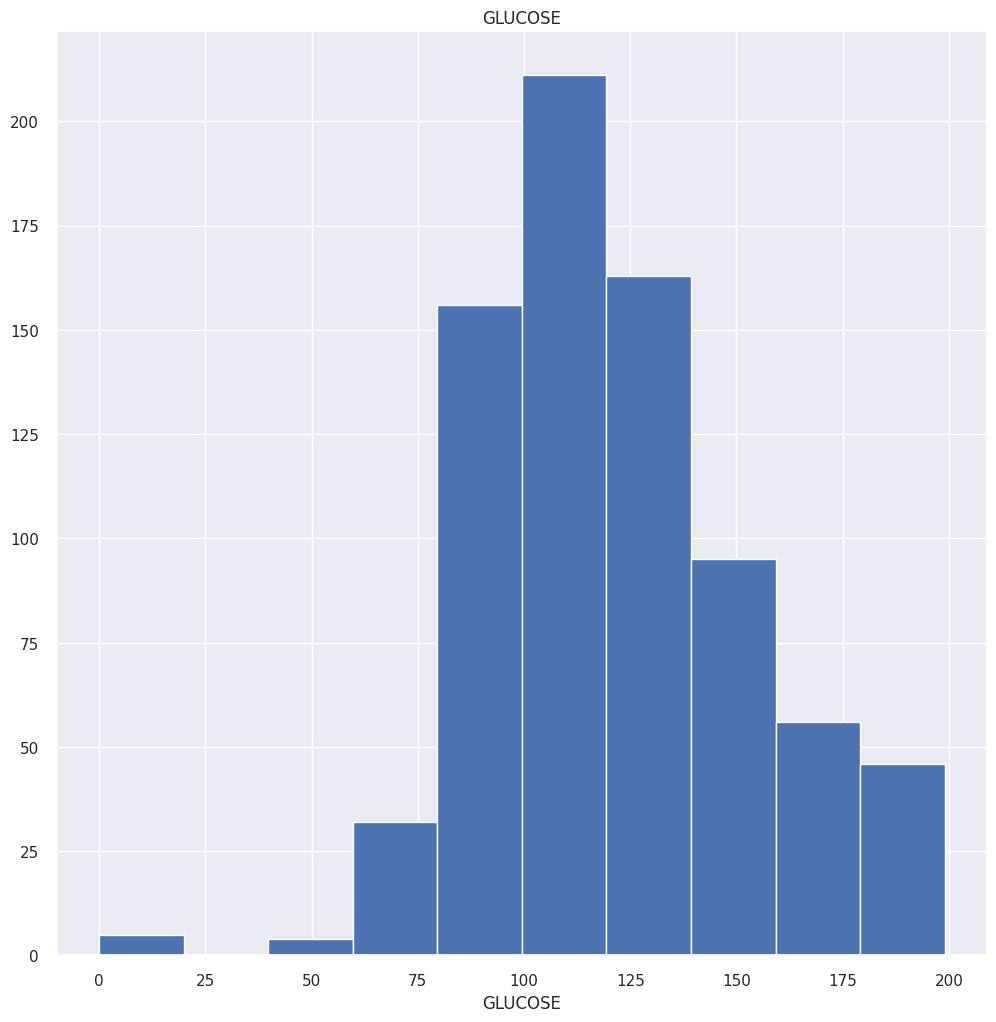

BLOODPRESSURE:
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       90.000000
99%      106.000000
100%     122.000000
max      122.000000
Name: BLOODPRESSURE, dtype: float64


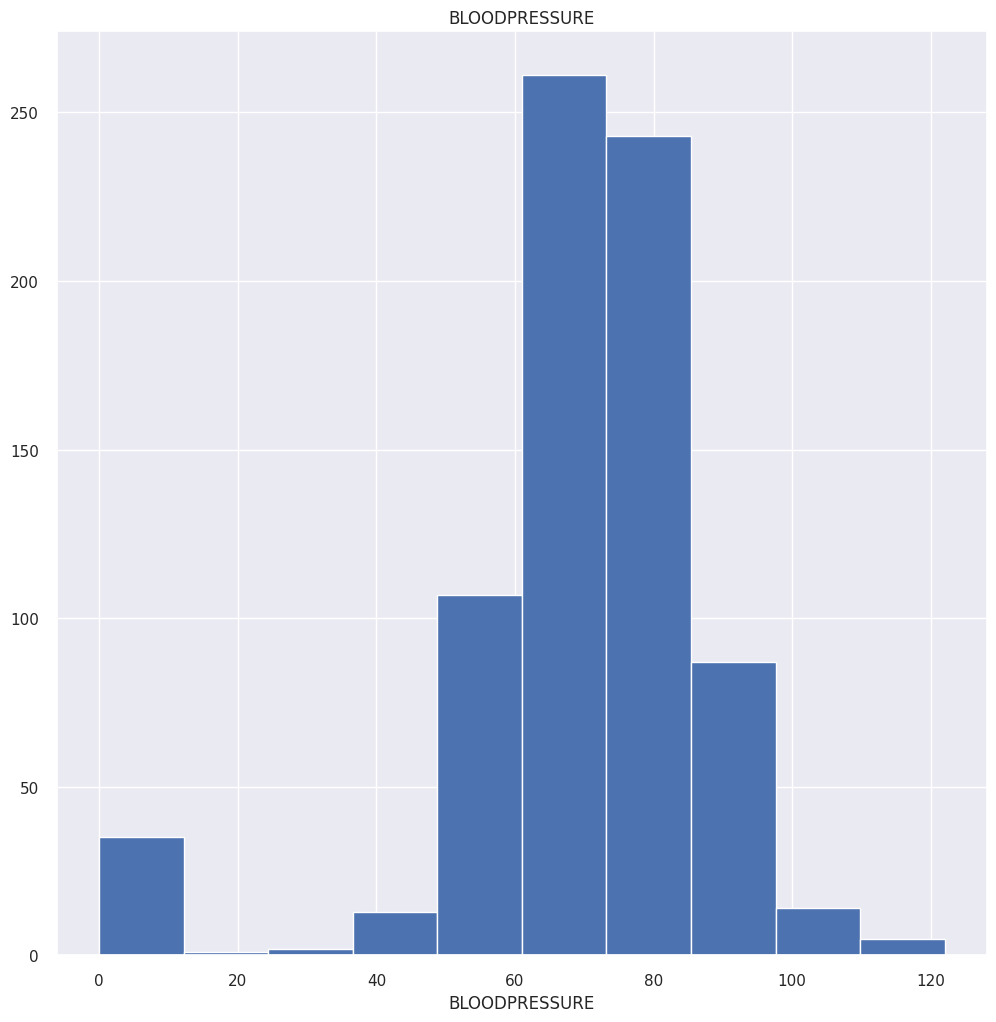

SKINTHICKNESS:
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
95%       44.000000
99%       51.330000
100%      99.000000
max       99.000000
Name: SKINTHICKNESS, dtype: float64


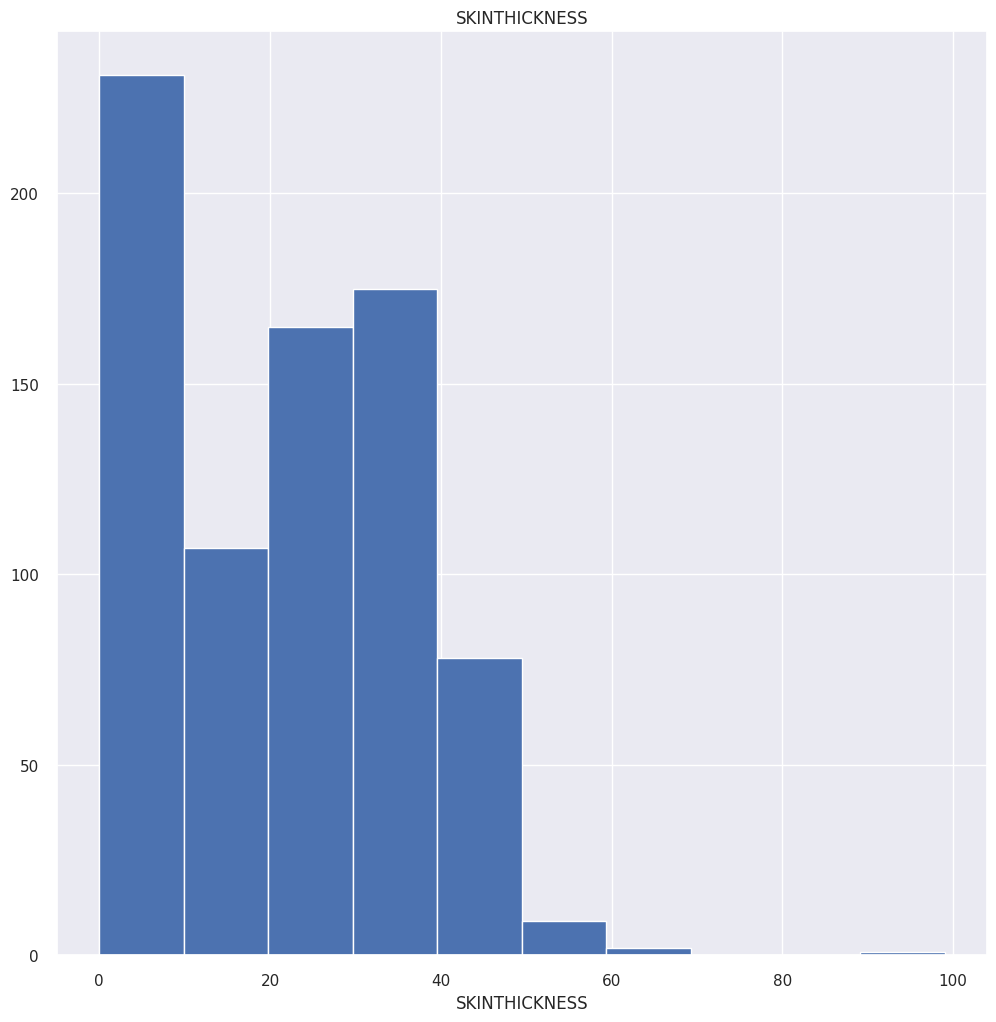

INSULIN:
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
95%      293.000000
99%      519.900000
100%     846.000000
max      846.000000
Name: INSULIN, dtype: float64


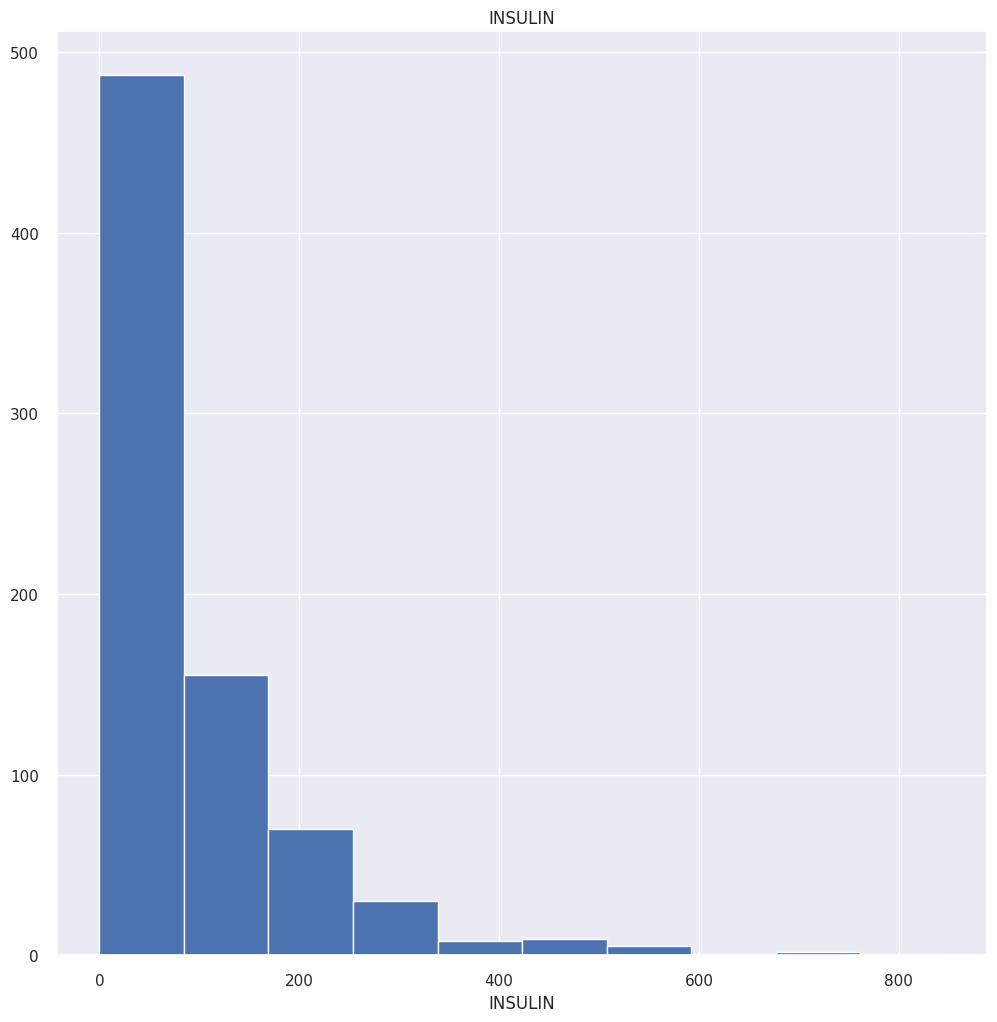

BMI:
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
5%        21.800000
10%       23.600000
20%       25.900000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
95%       44.395000
99%       50.759000
100%      67.100000
max       67.100000
Name: BMI, dtype: float64


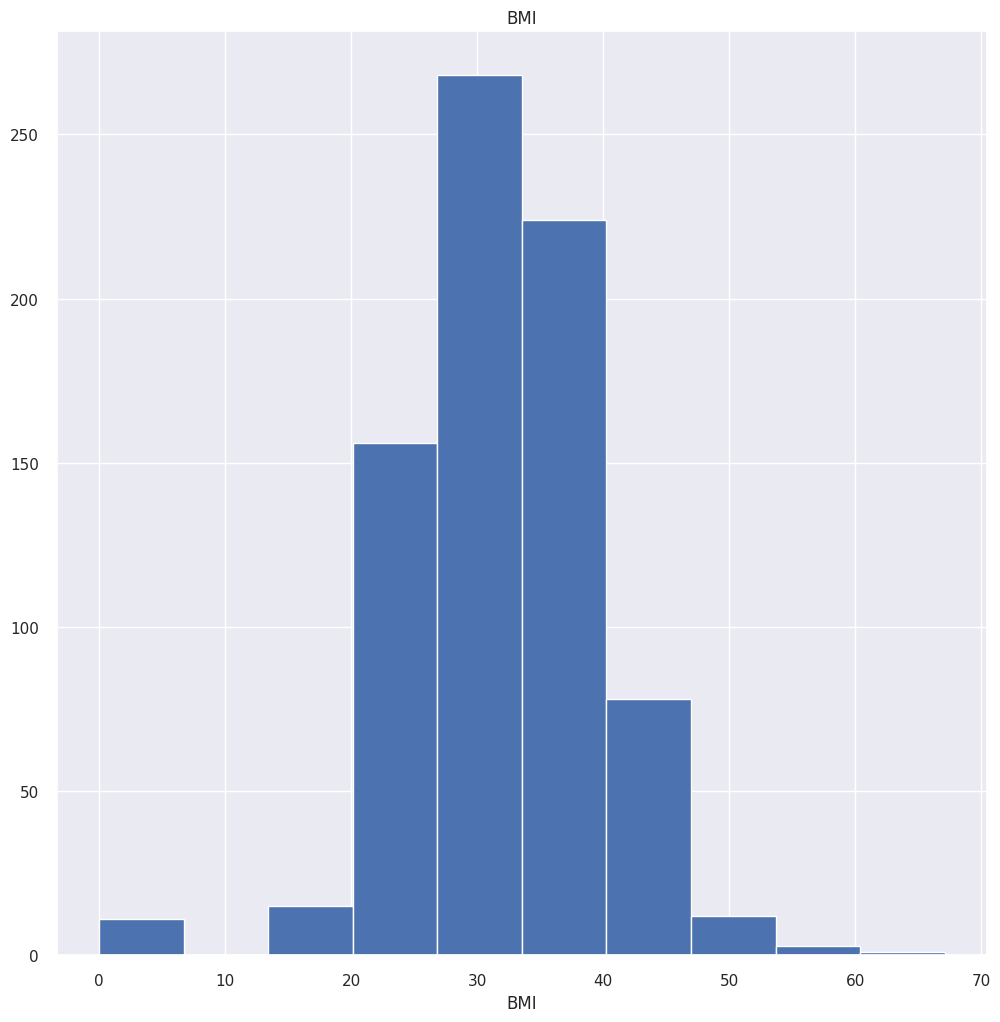

DIABETESPEDIGREEFUNCTION:
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
100%       2.420000
max        2.420000
Name: DIABETESPEDIGREEFUNCTION, dtype: float64


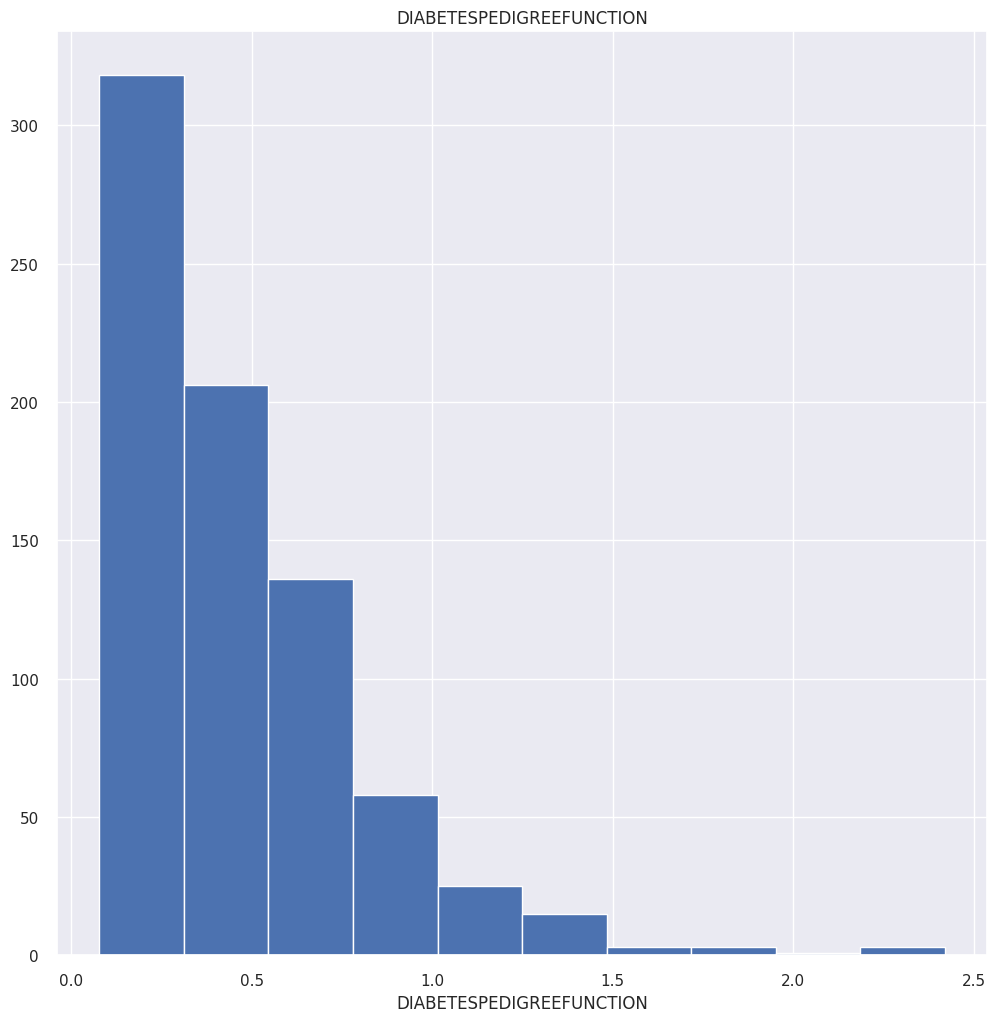

AGE:
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
100%      81.000000
max       81.000000
Name: AGE, dtype: float64


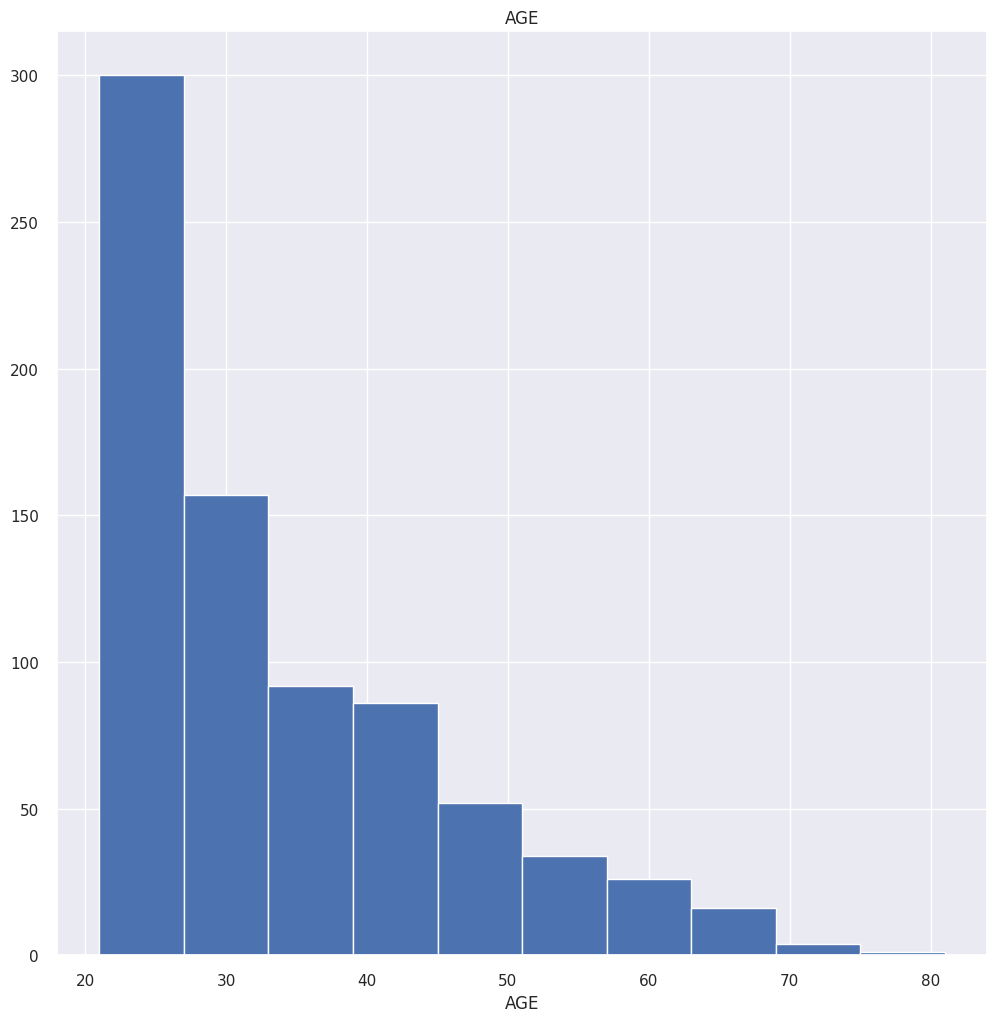

In [ ]:
def numSummary(dataframe, numericalCol, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
    print(dataframe[numericalCol].describe(quantiles).T)

    if plot:
        dataframe[numericalCol].hist()
        plt.xlabel(numericalCol)
        plt.title(numericalCol)
        plt.show(block=True)


for col in numCols:
    print(f"{col}:")
    numSummary(df, col, True)



*   Hedef değişken analizi (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)




In [ ]:
def targetSummaryWithNum(dataframe, target, numCol):
    print(dataframe.groupby(target).agg({numCol: "mean"}), end="\n\n\n")
for col in numCols:
    targetSummaryWithNum(df, 'OUTCOME', col)

         PREGNANCIES
OUTCOME             
0           3.298000
1           4.865672


            GLUCOSE
OUTCOME            
0        109.980000
1        141.257463


         BLOODPRESSURE
OUTCOME               
0            68.184000
1            70.824627


         SKINTHICKNESS
OUTCOME               
0            19.664000
1            22.164179


            INSULIN
OUTCOME            
0         68.792000
1        100.335821


               BMI
OUTCOME           
0        30.304200
1        35.142537


         DIABETESPEDIGREEFUNCTION
OUTCOME                          
0                        0.429734
1                        0.550500


               AGE
OUTCOME           
0        31.190000
1        37.067164




In [ ]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

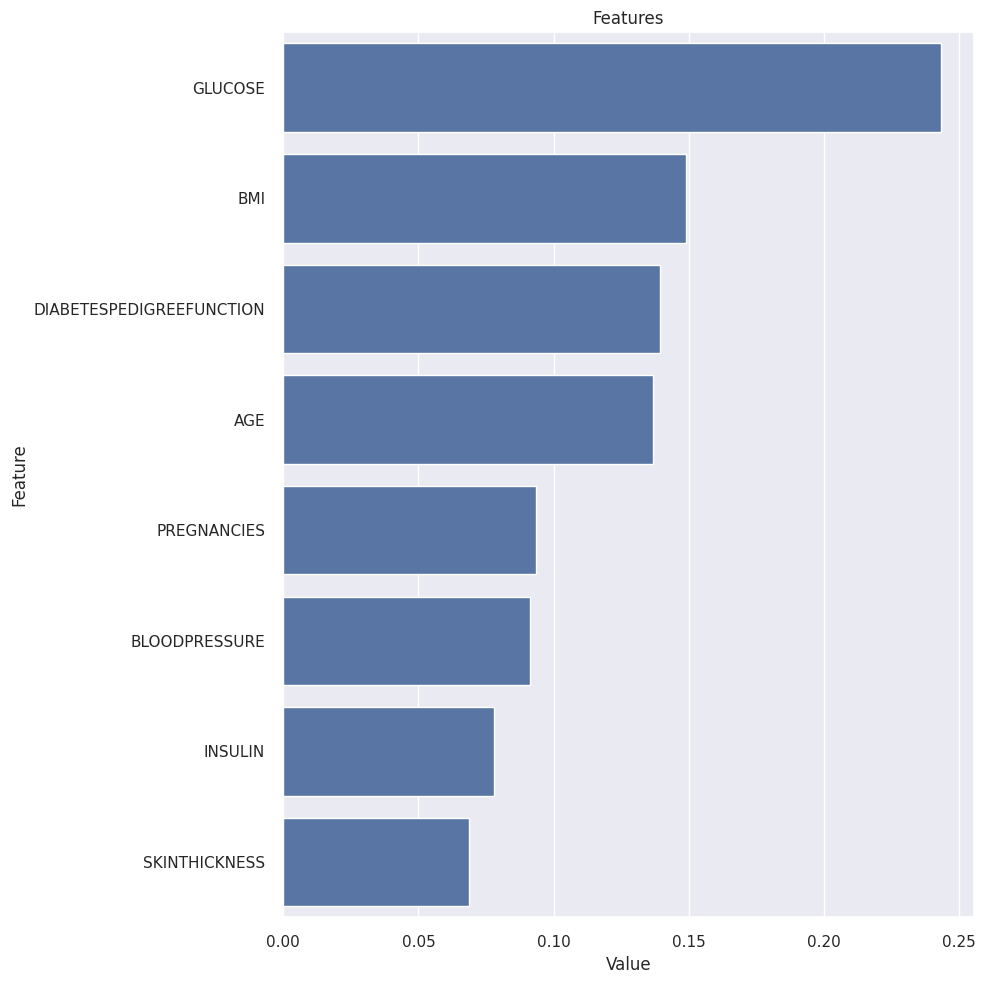

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X)



*   Aykırı gözlem analizi




In [ ]:
def outlierThresholds(dataframe, colName, q1=0.25, q3=0.75):
    quartile1 = dataframe[colName].quantile(q1)
    quartile3 = dataframe[colName].quantile(q3)
    interquantileRange = quartile3 - quartile1
    upLimit = quartile3 + 1.5 * interquantileRange
    lowLimit = quartile1 - 1.5 * interquantileRange
    return lowLimit, upLimit

def checkOutlier(dataframe, colName):
    lowLimit, upLimit = outlierThresholds(dataframe, colName)
    if dataframe[(dataframe[colName] > upLimit) | (dataframe[colName] < lowLimit)].any(axis=None):
        return True
    else:
        return False


for col in numCols:
    print(col, "-->", checkOutlier(df, col))

PREGNANCIES --> True
GLUCOSE --> True
BLOODPRESSURE --> True
SKINTHICKNESS --> True
INSULIN --> True
BMI --> True
DIABETESPEDIGREEFUNCTION --> True
AGE --> True


In [ ]:
def grabOutliers(dataframe, colName, index=False):
    low, up = outlierThresholds(dataframe, colName)

    if dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].shape[0] > 10:
        print(display(dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].head()))
    else:
        print((dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))]))

    if index:
        outlier_index = dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].index
        return outlier_index
for col in numCols:
    print(col, grabOutliers(df, col, True))

     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DIABETESPEDIGREEFUNCTION  AGE  OUTCOME  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
PREGNANCIES Index([88, 159, 298, 455], dtype='int64')
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80         

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0


None
BLOODPRESSURE Index([  7,  15,  18,  43,  49,  60,  78,  81,  84, 106, 125, 172, 177, 193,
       222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430, 435, 453,
       468, 484, 494, 522, 533, 535, 549, 589, 597, 601, 604, 619, 643, 691,
       697, 703, 706],
      dtype='int64')
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
579            2      197             70             99        0  34.7   

     DIABETESPEDIGREEFUNCTION  AGE  OUTCOME  
579                     0.575   62        1  
SKINTHICKNESS Index([579], dtype='int64')


,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0


None
INSULIN Index([  8,  13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258, 286,
       296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584, 612, 645,
       655, 695, 707, 710, 715, 753],
      dtype='int64')


,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
120,0,162,76,56,100,53.2,0.759,25,1


None
BMI Index([  9,  49,  60,  81, 120, 125, 145, 177, 193, 247, 303, 371, 426, 445,
       494, 522, 673, 684, 706],
      dtype='int64')


,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0


None
DIABETESPEDIGREEFUNCTION Index([  4,  12,  39,  45,  58, 100, 147, 187, 218, 228, 243, 245, 259, 292,
       308, 330, 370, 371, 383, 395, 445, 534, 593, 606, 618, 621, 622, 659,
       661],
      dtype='int64')
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
123            5      132             80              0        0  26.8   
363            4      146             78              0        0  38.5   
453            2      119              0              0        0  19.6   
459            9      134             74             33       60  25.9   
489            8      194             80              0        0  26.1   
537            0       57             60              0        0  21.7   
666            4      145             82             18        0  32.5   
674            8       91             82              0        0  35.6   
684            5      136             82              0        0   0.0   

     DIABETESPEDIGREEFUNCTION  AGE  OUTCO

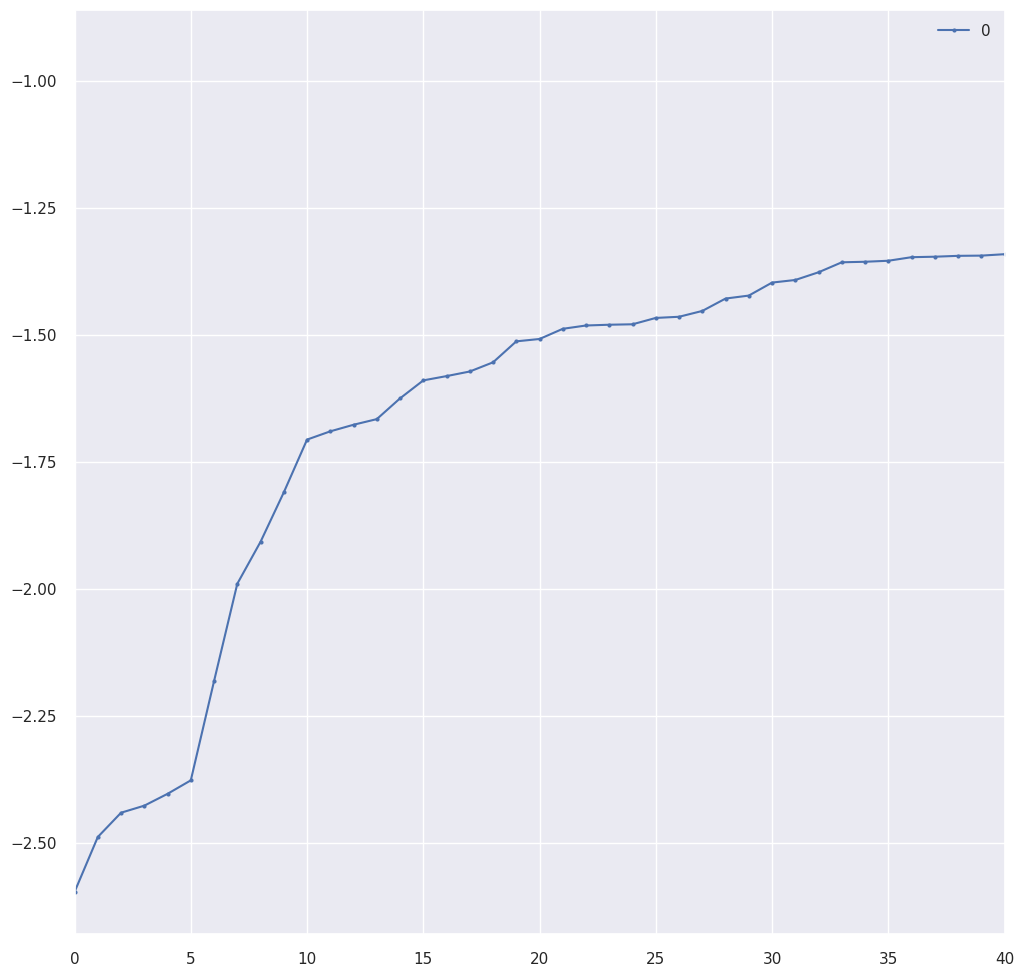

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
dfScores = clf.negative_outlier_factor_
scores = pd.DataFrame(np.sort(dfScores))
scores.plot(stacked=True, xlim=[0, 40], style=".-")
plt.show()



*   Eksik gözlem analizi




In [ ]:
def missingValuesTable(dataframe,naName = False):
    naColums = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    nMiss = dataframe[naColums].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[naColums].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missingDf = pd.concat([nMiss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missingDf,end='\n')
    if naName:
        return naColums


missingValuesTable(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []




*   Korelasyon analizi




In [ ]:
corr = df[numCols].corr()
corr

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
PREGNANCIES,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
GLUCOSE,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BLOODPRESSURE,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SKINTHICKNESS,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
INSULIN,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DIABETESPEDIGREEFUNCTION,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
AGE,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


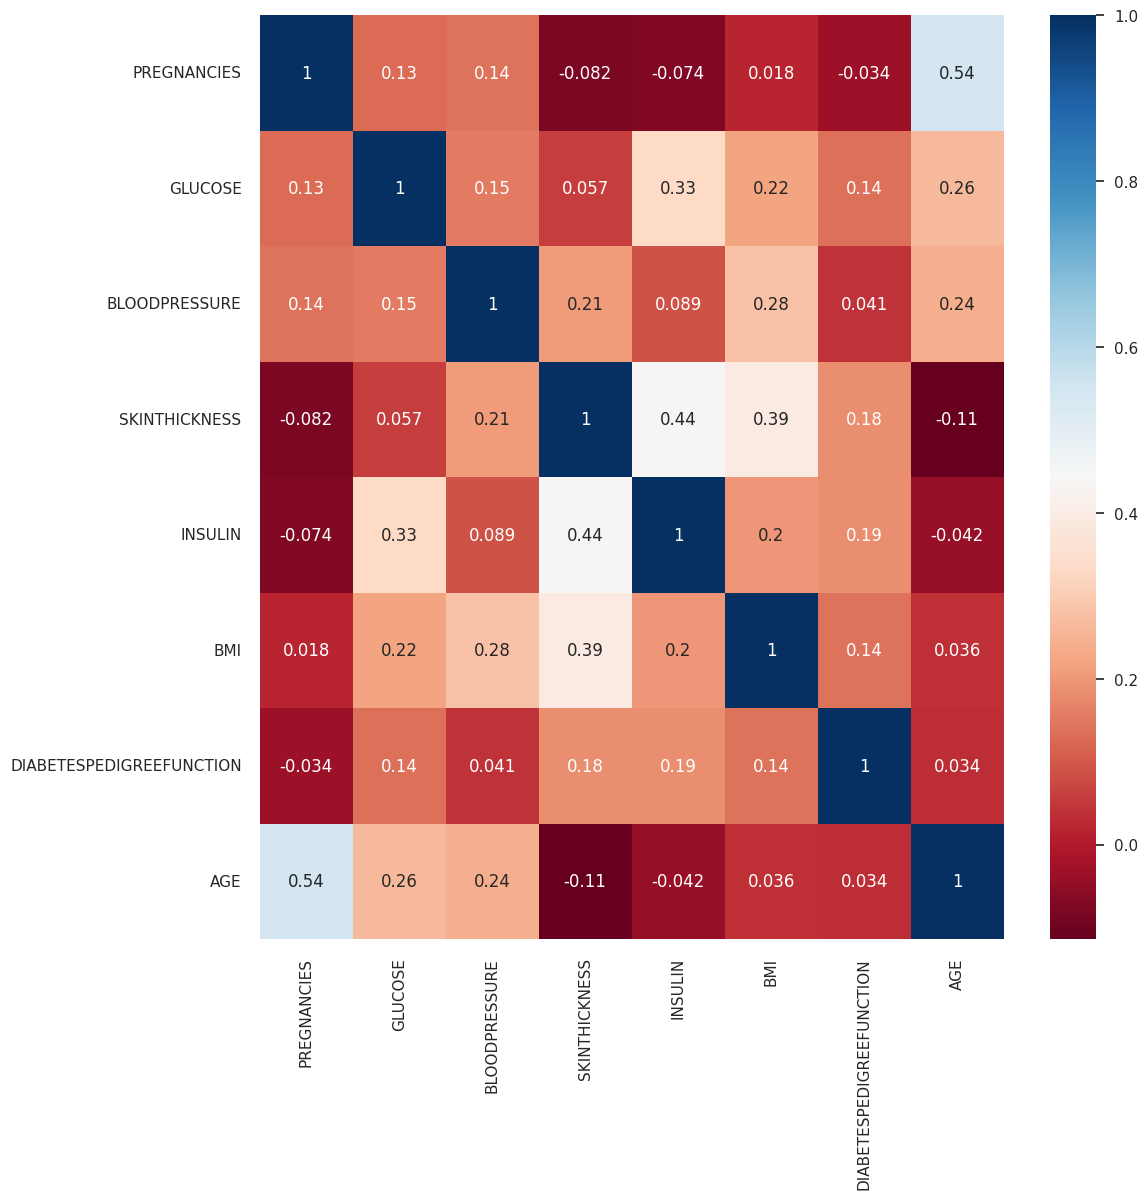

In [ ]:
sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

# **Feature Engineering**



*   Eksik ve aykırı değerler




In [ ]:
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

In [ ]:
def missingVsTarget(dataframe, target, naColumns):
    tempDf = dataframe.copy()
    for col in naColumns:
        tempDf[col + '_NA_FLAG'] = np.where(tempDf[col].isnull(), 1, 0)
    naFlags = tempDf.loc[:, tempDf.columns.str.contains('_NA_')].columns
    for col in naFlags:
        print(pd.DataFrame({'TARGET_MEAN': tempDf.groupby(col)[target].mean(),
                            'Count': tempDf.groupby(col)[target].count()}), end='\n\n\n')


zeroToNanCols = ['GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI']
for col in zeroToNanCols:
    df[col] = df[col].replace({'0': np.nan, 0: np.nan})

missingValuesTable(df)

               n_miss  ratio
INSULIN           374  48.70
SKINTHICKNESS     227  29.56
BLOODPRESSURE      35   4.56
BMI                11   1.43
GLUCOSE             5   0.65


In [ ]:
missingVsTarget(df, 'OUTCOME', zeroToNanCols)


                 TARGET_MEAN  Count
GLUCOSE_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BLOODPRESSURE_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SKINTHICKNESS_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


                 TARGET_MEAN  Count
INSULIN_NA_FLAG                    
0                   0.329949    394
1                   0.368984    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11




In [ ]:
def replaceWithThresholds(dataframe, colName):
    low, up = outlierThresholds(dataframe, colName)

    dataframe.loc[dataframe[colName] > up, colName] = up
    dataframe.loc[dataframe[colName] < low, colName] = low


for col in numCols:
    replaceWithThresholds(df, col)
for col in numCols:
    print(col, checkOutlier(df, col))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN False
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


In [ ]:
df["INSULIN"].fillna(df["INSULIN"].mean(), inplace=True)
df["SKINTHICKNESS"].fillna(df["SKINTHICKNESS"].mean(), inplace=True)
df["BMI"].fillna(df["BMI"].mean(), inplace=True)
df["BLOODPRESSURE"].fillna(df["BLOODPRESSURE"].mean(), inplace=True)
df["GLUCOSE"].fillna(df["GLUCOSE"].mean(), inplace=True)



*   Yeni değişkenler oluşturulması




In [ ]:
df.loc[(df["AGE"] >= 21) & (df["AGE"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 50), "NEW_AGE_CAT"] = "senior"

In [ ]:
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                       labels=["Underweight", "Healthy", "Overweight", "Obese"])

In [ ]:
df["NEW_GLUCOSE"] = pd.cut(x=df["GLUCOSE"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])

In [ ]:
df.loc[(df["BMI"] < 18.5) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (
        (df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (
        (df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["AGE"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

In [ ]:
df.loc[(df["GLUCOSE"] < 70) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["GLUCOSE"] < 70) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["GLUCOSE"] >= 70) & (df["GLUCOSE"] < 100)) & (
        (df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["GLUCOSE"] >= 70) & (df["GLUCOSE"] < 100)) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["GLUCOSE"] >= 100) & (df["GLUCOSE"] <= 125)) & (
        (df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["GLUCOSE"] >= 100) & (df["GLUCOSE"] <= 125)) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["GLUCOSE"] > 125) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["GLUCOSE"] > 125) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

In [ ]:
def set_INSULIN(dataframe, col_name="INSULIN"):
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else:
        return "Abnormal"


df["NEW_INSULIN_SCORE"] = df.apply(set_INSULIN, axis=1)

df["NEW_GLUCOSE*INSULIN"] = df["GLUCOSE"] * df["INSULIN"]
df["NEW_GLUCOSE*PREGNANCIES"] = df["GLUCOSE"] * df["PREGNANCIES"]

df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6.0,148.0,72.0,35.00000,146.5,33.6,0.627,50.0,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal,21682.0,888.0
1,1.0,85.0,66.0,29.00000,146.5,26.6,0.351,31.0,0,mature,Overweight,Normal,obesemature,normalmature,Normal,12452.5,85.0
2,8.0,183.0,64.0,29.05915,146.5,23.3,0.672,32.0,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal,26809.5,1464.0
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21.0,0,mature,Overweight,Normal,obesemature,normalmature,Normal,8366.0,89.0
4,0.0,137.0,40.0,35.00000,168.0,43.1,1.200,33.0,1,mature,Obese,Normal,obesemature,highmature,Abnormal,23016.0,0.0


## **Encoding**



*   label Encoder




In [ ]:
def labelEncoder(dataframe, binaryCol):
    labelencoder = LabelEncoder()
    dataframe[binaryCol] = labelencoder.fit_transform(dataframe[binaryCol])
    return dataframe

In [ ]:
binaryCols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
binaryCols

['NEW_AGE_CAT', 'NEW_GLUCOSE', 'NEW_INSULIN_SCORE']

In [ ]:
for col in binaryCols:
    labelEncoder(df, col)

df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6.0,148.0,72.0,35.00000,146.5,33.6,0.627,50.0,1,1,Obese,1,obesesenior,highsenior,1,21682.0,888.0
1,1.0,85.0,66.0,29.00000,146.5,26.6,0.351,31.0,0,0,Overweight,0,obesemature,normalmature,1,12452.5,85.0
2,8.0,183.0,64.0,29.05915,146.5,23.3,0.672,32.0,1,0,Healthy,1,obesemature,highmature,1,26809.5,1464.0
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21.0,0,0,Overweight,0,obesemature,normalmature,1,8366.0,89.0
4,0.0,137.0,40.0,35.00000,168.0,43.1,1.200,33.0,1,0,Obese,0,obesemature,highmature,0,23016.0,0.0




*   rareAnalyzer




In [ ]:
def rareAnalyzer(dataframe, target, catCols):
    for col in  catCols:
        print(col,":",len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),"RATIO": dataframe[col].value_counts() / len(dataframe),"TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rareAnalyzer(df, 'OUTCOME', binaryCols)

NEW_AGE_CAT : 2
             COUNT     RATIO  TARGET_MEAN
NEW_AGE_CAT                              
0              679  0.884115     0.331370
1               89  0.115885     0.483146


NEW_GLUCOSE : 2
             COUNT  RATIO  TARGET_MEAN
NEW_GLUCOSE                           
0              576   0.75     0.236111
1              192   0.25     0.687500


NEW_INSULIN_SCORE : 2
                   COUNT     RATIO  TARGET_MEAN
NEW_INSULIN_SCORE                              
0                    134  0.174479     0.522388
1                    634  0.825521     0.312303




In [ ]:
def rareEncoder(dataframe, rarePerc):
    tempDf = dataframe.copy()
    rare_columns = [col for col in tempDf.columns if tempDf[col].dtypes == "O" and (tempDf[col].value_counts() / len(tempDf) < rarePerc).any(axis = None)]
    for var in rare_columns:
        tmp = tempDf[var].value_counts() / len(tempDf)
        rareLabels = tmp[tmp < rarePerc].index
        tempDf[var] = np.where(tempDf[var].isin(rareLabels), "Rare", tempDf[var])
    return tempDf


newDf = rareEncoder(df, 0.01)



*   one Hot Encoder




In [ ]:
def oneHotEncoder(dataframe, categoricalCols, drop_first = False):
    dataframe = pd.get_dummies(dataframe, columns=categoricalCols,drop_first=drop_first)
    return dataframe

oheCols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
oheCols

['NEW_BMI', 'NEW_AGE_BMI_NOM', 'NEW_AGE_GLUCOSE_NOM']

In [ ]:
df = oneHotEncoder(df, oheCols)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,...,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddenmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior
0,6.0,148.0,72.0,35.00000,146.5,33.6,0.627,50.0,1,1,...,True,False,False,False,False,True,False,False,False,False
1,1.0,85.0,66.0,29.00000,146.5,26.6,0.351,31.0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,8.0,183.0,64.0,29.05915,146.5,23.3,0.672,32.0,1,0,...,False,False,False,False,True,False,False,False,False,False
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21.0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0.0,137.0,40.0,35.00000,168.0,43.1,1.200,33.0,1,0,...,False,False,False,False,True,False,False,False,False,False




## **Standartlaştırma**




In [ ]:
df_scaler =df.copy()
scaler = StandardScaler()
df_scaler[numCols] = scaler.fit_transform(df_scaler[numCols])
df_scaler[numCols].head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
0,0.647150,0.865108,-0.032095,7.044545e-01,0.000000,0.180889,0.588927,1.445691
1,-0.848970,-1.206162,-0.545389,-7.013859e-03,0.000000,-0.869670,-0.378101,-0.189304
2,1.245598,2.015813,-0.716487,-4.212739e-16,0.000000,-1.364934,0.746595,-0.103252
3,-0.848970,-1.074652,-0.545389,-7.184822e-01,-0.812309,-0.644550,-1.022787,-1.049828
4,-1.148194,0.503458,-2.769661,7.044545e-01,0.332660,1.606647,2.596563,-0.017199


# **Model**

## **k means**

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df_k =df_scaler.copy()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df_k)  # x imizi giricez yani df değerlerimizi giriyoruz.
kmeans.get_params()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

**Elbow Method**
(WCSS) Küme İçi Kareler Toplamı :  her bir küme merkezi ile o kümedeki noktalar arasındaki mesafelerin karelerinin toplamı



In [ ]:
kmeans = KMeans()
ssd = []
K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

ssd

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[104972154349.20448,
 38019110947.51448,
 18204261761.802372,
 10607701560.707443,
 7006015233.596721,
 4879276007.7959175,
 3743954224.4637313,
 2855705631.3085194,
 2239043903.215702,
 1815214798.3765917,
 1456001022.0601633,
 1274964443.3785653,
 1117494293.4672067,
 1018788406.7241226,
 875303949.8941541,
 776634331.1133678,
 694699393.080065,
 629569005.1310847,
 565011158.4855595,
 521681872.73735476,
 493497910.9048579,
 440255554.5755639,
 426157187.817459,
 403332528.4575697,
 377876641.10772574,
 368051711.29366505,
 348766201.472394,
 334140317.0905813,
 319974260.5696176]

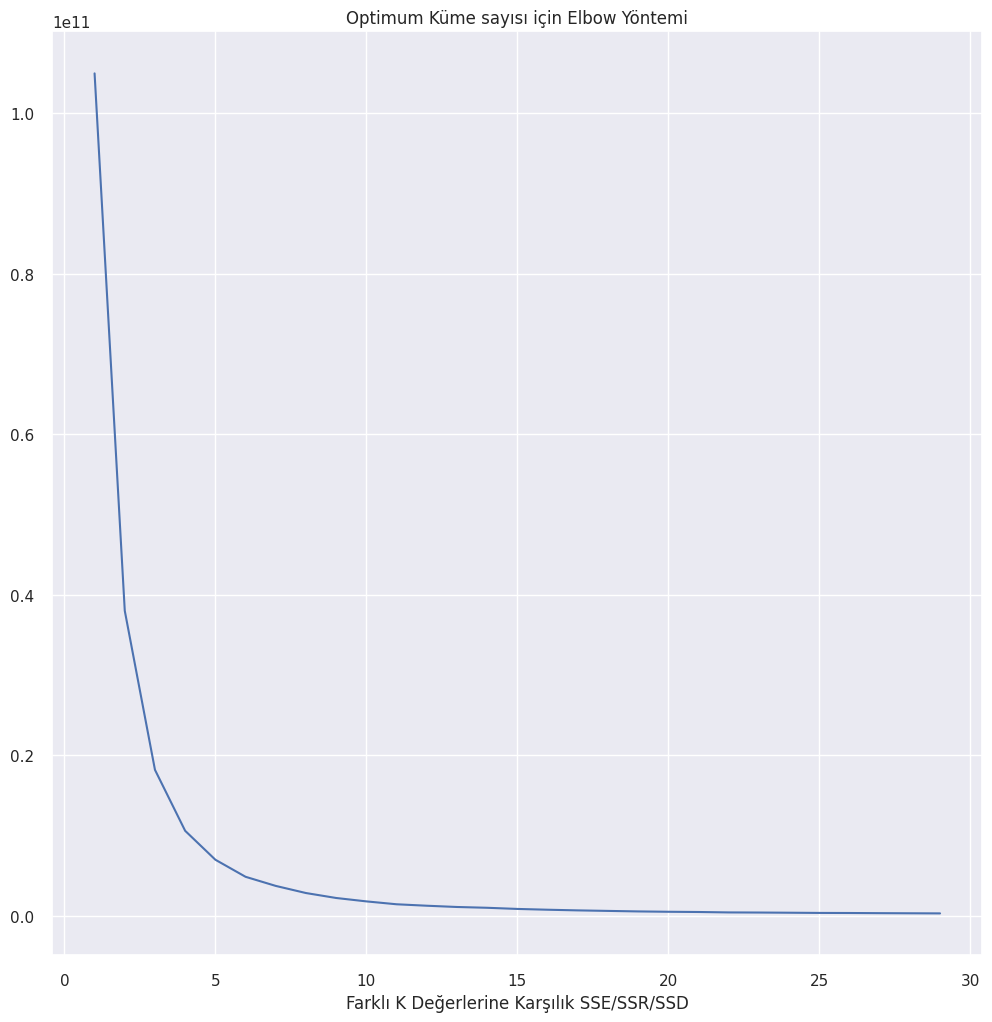

In [ ]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

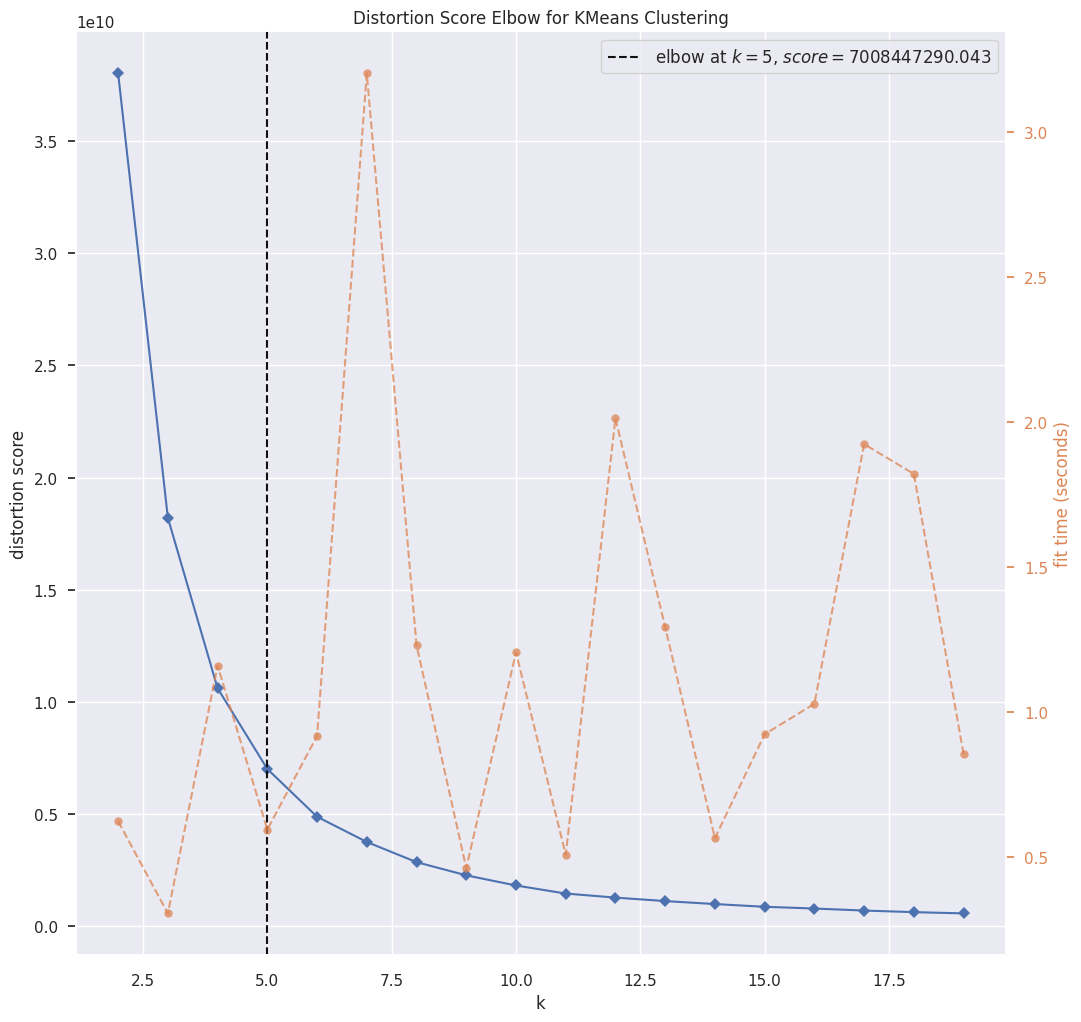

5

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

elbow.elbow_value_

In [ ]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

pca = PCA(n_components=2)  # boyut indirgeme
X_pca = pca.fit_transform(df_k)

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels) #  -1 ve 1 aralığı

0.06388509143795042

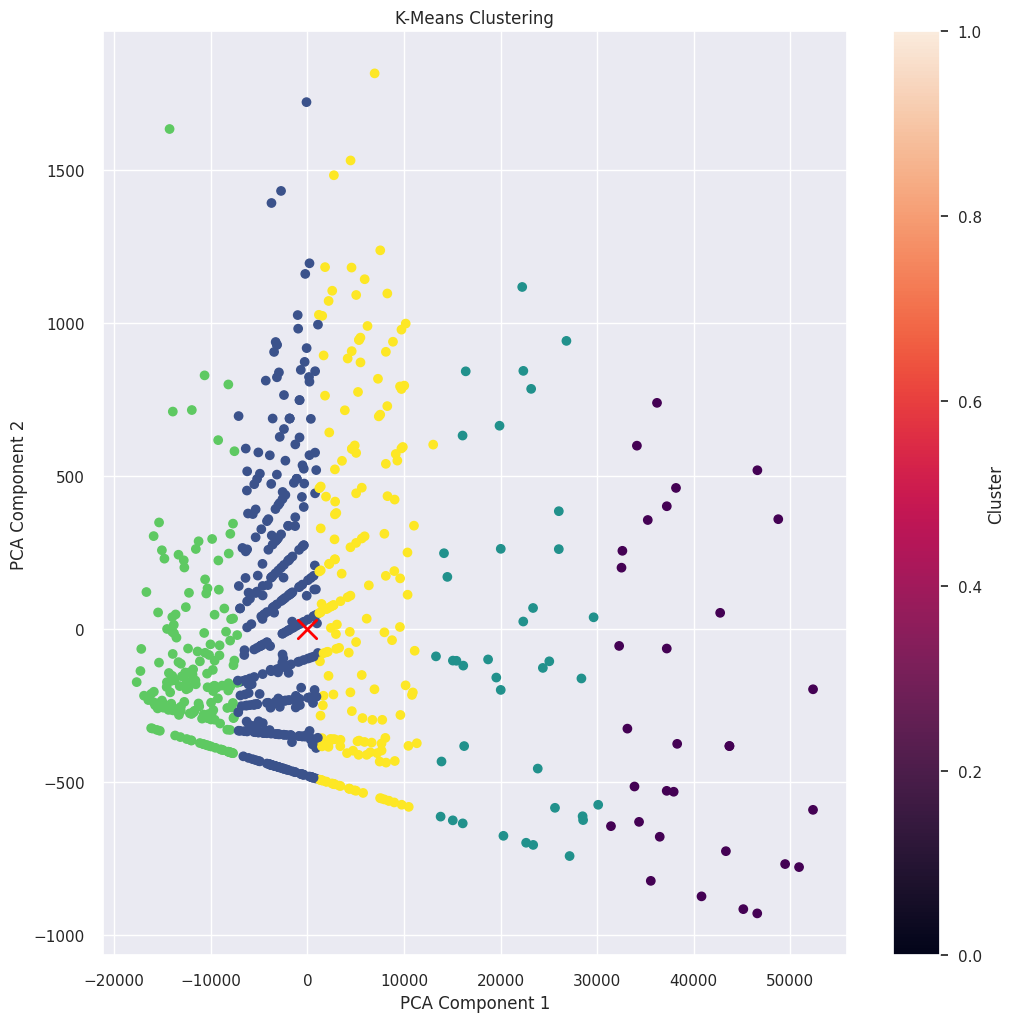

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200)  # Küme merkezlerini görselleştirin
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

## **ANFİS**

In [ ]:
!pip install -q scikit-fuzzy

In [ ]:
df_anf =df.copy()

y = df_anf["OUTCOME"]
X = df_anf.drop("OUTCOME", axis=1)

X_train, X_test, train_y, test_y = train_test_split(df, labels, test_size=0.20, random_state=42, stratify=labels)

threshold_feature_selection = 2
x_train = X_train.iloc[:, 0:2]
x_test = X_test.iloc[:, 0:2]

In [ ]:
from skfuzzy import gaussmf, gbellmf, sigmf

class MemFuncs:
    'Common base class for all employees'
    funcDict = {'gaussmf': gaussmf, 'gbellmf': gbellmf, 'sigmf': sigmf}


    def __init__(self, MFList):
        self.MFList = MFList

    def evaluateMF(self, rowInput):
        if len(rowInput) != len(self.MFList):
            print("Number of variables does not match number of rule sets")

        return [[self.funcDict[self.MFList[i][k][0]](rowInput[i],**self.MFList[i][k][1]) for k in range(len(self.MFList[i]))] for i in range(len(rowInput))]

In [ ]:
def partial_dMF(x, mf_definition, partial_parameter):
    mf_name = mf_definition[0]

    if mf_name == 'gaussmf':

        sigma = mf_definition[1]['sigma']
        mean = mf_definition[1]['mean']

        if partial_parameter == 'sigma':
            result = (2./sigma**3) * np.exp(-(((x-mean)**2)/(sigma)**2))*(x-mean)**2
        elif partial_parameter == 'mean':
            result = (2./sigma**2) * np.exp(-(((x-mean)**2)/(sigma)**2))*(x-mean)

    elif mf_name == 'gbellmf':

        a = mf_definition[1]['a']
        b = mf_definition[1]['b']
        c = mf_definition[1]['c']

        if partial_parameter == 'a':
            result = (2. * b * np.power((c-x),2) * np.power(np.absolute((c-x)/a), ((2 * b) - 2))) / \
                (np.power(a, 3) * np.power((np.power(np.absolute((c-x)/a),(2*b)) + 1), 2))
        elif partial_parameter == 'b':
            result = -1 * (2 * np.power(np.absolute((c-x)/a), (2 * b)) * np.log(np.absolute((c-x)/a))) / \
                (np.power((np.power(np.absolute((c-x)/a), (2 * b)) + 1), 2))
        elif partial_parameter == 'c':
            result = (2. * b * (c-x) * np.power(np.absolute((c-x)/a), ((2 * b) - 2))) / \
                (np.power(a, 2) * np.power((np.power(np.absolute((c-x)/a),(2*b)) + 1), 2))

    elif mf_name == 'sigmf':

        b = mf_definition[1]['b']
        c = mf_definition[1]['c']

        if partial_parameter == 'b':
            result = -1 * (c * np.exp(c * (b + x))) / \
                np.power((np.exp(b*c) + np.exp(c*x)), 2)
        elif partial_parameter == 'c':
            result = ((x - b) * np.exp(c * (x - b))) / \
                np.power((np.exp(c * (x - c))) + 1, 2)


    return result

In [ ]:
import itertools
import numpy as np
import copy

class ANFIS:
    def __init__(self, X, Y, memFunction):
        self.X = np.array(copy.copy(X))
        self.Y = np.array(copy.copy(Y))
        self.XLen = len(self.X)
        self.memClass = copy.deepcopy(memFunction)
        self.memFuncs = self.memClass.MFList
        self.memFuncsByVariable = [[x for x in range(len(self.memFuncs[z]))] for z in range(len(self.memFuncs))]
        self.rules = np.array(list(itertools.product(*self.memFuncsByVariable)))
        self.consequents = np.empty(self.Y.ndim * len(self.rules) * (self.X.shape[1] + 1))
        self.consequents.fill(0)
        self.errors = np.empty(0)
        self.memFuncsHomo = all(len(i)==len(self.memFuncsByVariable[0]) for i in self.memFuncsByVariable)
        self.trainingType = 'Not trained yet'

    def LSE(self, A, B, initialGamma = 1000.):
        coeffMat = A
        rhsMat = B
        S = np.eye(coeffMat.shape[1])*initialGamma
        x = np.zeros((coeffMat.shape[1],1)) # need to correct for multi-dim B
        for i in range(len(coeffMat[:,0])):
            a = coeffMat[i,:]
            b = np.array(rhsMat[i])
            S = S - (np.array(np.dot(np.dot(np.dot(S,np.matrix(a).transpose()),np.matrix(a)),S)))/(1+(np.dot(np.dot(S,a),a)))
            x = x + (np.dot(S,np.dot(np.matrix(a).transpose(),(np.matrix(b)-np.dot(np.matrix(a),x)))))
        return x

    def trainHybridJangOffLine(self, epochs=5, tolerance=1e-5, initialGamma=1000, k=0.01):

        self.trainingType = 'trainHybridJangOffLine'
        convergence = False
        epoch = 1

        while (epoch < epochs) and (convergence is not True):

            #layer four: forward pass
            [layerFour, wSum, w] = forwardHalfPass(self, self.X)

            #layer five: least squares estimate
            layerFive = np.array(self.LSE(layerFour,self.Y,initialGamma))
            self.consequents = layerFive
            layerFive = np.dot(layerFour,layerFive)

            #error
            error = np.sum((self.Y-layerFive.T)**2)
            print('current error: '+ str(error))
            average_error = np.average(np.absolute(self.Y-layerFive.T))
            self.errors = np.append(self.errors,error)

            if len(self.errors) != 0:
                if self.errors[len(self.errors)-1] < tolerance:
                    convergence = True

            # back propagation
            if convergence is not True:
                cols = range(len(self.X[0,:]))
                dE_dAlpha = list(backprop(self, colX, cols, wSum, w, layerFive) for colX in range(self.X.shape[1]))


            if len(self.errors) >= 4:
                if (self.errors[-4] > self.errors[-3] > self.errors[-2] > self.errors[-1]):
                    k = k * 1.1

            if len(self.errors) >= 5:
                if (self.errors[-1] < self.errors[-2]) and (self.errors[-3] < self.errors[-2]) and (self.errors[-3] < self.errors[-4]) and (self.errors[-5] > self.errors[-4]):
                    k = k * 0.9

            ## handling of variables with a different number of MFs
            t = []
            for x in range(len(dE_dAlpha)):
                for y in range(len(dE_dAlpha[x])):
                    for z in range(len(dE_dAlpha[x][y])):
                        t.append(dE_dAlpha[x][y][z])

            eta = k / np.abs(np.sum(t))

            if(np.isinf(eta)):
                eta = k

            ## handling of variables with a different number of MFs
            dAlpha = copy.deepcopy(dE_dAlpha)
            if not(self.memFuncsHomo):
                for x in range(len(dE_dAlpha)):
                    for y in range(len(dE_dAlpha[x])):
                        for z in range(len(dE_dAlpha[x][y])):
                            dAlpha[x][y][z] = -eta * dE_dAlpha[x][y][z]
            else:
                dAlpha = -eta * np.array(dE_dAlpha)


            for varsWithMemFuncs in range(len(self.memFuncs)):
                for MFs in range(len(self.memFuncsByVariable[varsWithMemFuncs])):
                    paramList = sorted(self.memFuncs[varsWithMemFuncs][MFs][1])
                    for param in range(len(paramList)):
                        self.memFuncs[varsWithMemFuncs][MFs][1][paramList[param]] = self.memFuncs[varsWithMemFuncs][MFs][1][paramList[param]] + dAlpha[varsWithMemFuncs][MFs][param]
            epoch = epoch + 1


        self.fittedValues = predict(self,self.X)
        self.residuals = self.Y - self.fittedValues[:,0]

        return self.fittedValues


    def plotErrors(self):
        if self.trainingType == 'Not trained yet':
            print(self.trainingType)
        else:
            import matplotlib.pyplot as plt
            plt.plot(range(len(self.errors)),self.errors,'ro', label='errors')
            plt.ylabel('error')
            plt.xlabel('epoch')
            plt.show()

    def plotMF(self, x, inputVar):
        import matplotlib.pyplot as plt
        from skfuzzy import gaussmf, gbellmf, sigmf

        for mf in range(len(self.memFuncs[inputVar])):
            if self.memFuncs[inputVar][mf][0] == 'gaussmf':
                y = gaussmf(x,**self.memClass.MFList[inputVar][mf][1])
            elif self.memFuncs[inputVar][mf][0] == 'gbellmf':
                y = gbellmf(x,**self.memClass.MFList[inputVar][mf][1])
            elif self.memFuncs[inputVar][mf][0] == 'sigmf':
                y = sigmf(x,**self.memClass.MFList[inputVar][mf][1])

            plt.plot(x,y,'r')

        plt.show()

    def plotResults(self):
        if self.trainingType == 'Not trained yet':
            print(self.trainingType)
        else:
            import matplotlib.pyplot as plt
            plt.plot(range(len(self.fittedValues)),self.fittedValues,'r', label='trained')
            plt.plot(range(len(self.Y)),self.Y,'b', label='original')
            plt.legend(loc='upper left')
            plt.show()

In [ ]:
def forwardHalfPass(ANFISObj, Xs):
    layerFour = np.empty(0,)
    wSum = []

    for pattern in range(len(Xs[:,0])):
        #layer one
        layerOne = ANFISObj.memClass.evaluateMF(Xs[pattern,:])

        #layer two
        miAlloc = [[layerOne[x][ANFISObj.rules[row][x]] for x in range(len(ANFISObj.rules[0]))] for row in range(len(ANFISObj.rules))]
        layerTwo = np.array([np.product(x) for x in miAlloc]).T
        if pattern == 0:
            w = layerTwo
        else:
            w = np.vstack((w,layerTwo))

        #layer three
        wSum.append(np.sum(layerTwo))
        if pattern == 0:
            wNormalized = layerTwo/wSum[pattern]
        else:
            wNormalized = np.vstack((wNormalized,layerTwo/wSum[pattern]))

        #prep for layer four (bit of a hack)
        layerThree = layerTwo/wSum[pattern]
        rowHolder = np.concatenate([x*np.append(Xs[pattern,:],1) for x in layerThree])
        layerFour = np.append(layerFour,rowHolder)

    w = w.T
    wNormalized = wNormalized.T

    layerFour = np.array(np.array_split(layerFour,pattern + 1))

    return layerFour, wSum, w

In [ ]:
def backprop(ANFISObj, columnX, columns, theWSum, theW, theLayerFive):

    paramGrp = [0]* len(ANFISObj.memFuncs[columnX])
    for MF in range(len(ANFISObj.memFuncs[columnX])):

        parameters = np.empty(len(ANFISObj.memFuncs[columnX][MF][1]))
        timesThru = 0
        for alpha in sorted(ANFISObj.memFuncs[columnX][MF][1].keys()):

            bucket3 = np.empty(len(ANFISObj.X))
            for rowX in range(len(ANFISObj.X)):
                varToTest = ANFISObj.X[rowX,columnX]
                tmpRow = np.empty(len(ANFISObj.memFuncs))
                tmpRow.fill(varToTest)

                bucket2 = np.empty(ANFISObj.Y.ndim)
                for colY in range(ANFISObj.Y.ndim):

                    rulesWithAlpha = np.array(np.where(ANFISObj.rules[:,columnX]==MF))[0]
                    adjCols = np.delete(columns,columnX)

                    senSit = partial_dMF(ANFISObj.X[rowX,columnX],ANFISObj.memFuncs[columnX][MF],alpha)
                    # produces d_ruleOutput/d_parameterWithinMF
                    dW_dAplha = senSit * np.array([np.prod([ANFISObj.memClass.evaluateMF(tmpRow)[c][ANFISObj.rules[r][c]] for c in adjCols]) for r in rulesWithAlpha])

                    bucket1 = np.empty(len(ANFISObj.rules[:,0]))
                    for consequent in range(len(ANFISObj.rules[:,0])):
                        fConsequent = np.dot(np.append(ANFISObj.X[rowX,:],1.),ANFISObj.consequents[((ANFISObj.X.shape[1] + 1) * consequent):(((ANFISObj.X.shape[1] + 1) * consequent) + (ANFISObj.X.shape[1] + 1)),colY])
                        acum = 0
                        if consequent in rulesWithAlpha:
                            acum = dW_dAplha[np.where(rulesWithAlpha==consequent)] * theWSum[rowX]

                        acum = acum - theW[consequent,rowX] * np.sum(dW_dAplha)
                        acum = acum / theWSum[rowX]**2
                        bucket1[consequent] = fConsequent * acum

                    sum1 = np.sum(bucket1)

                    if ANFISObj.Y.ndim == 1:
                        bucket2[colY] = sum1 * (ANFISObj.Y[rowX]-theLayerFive[rowX,colY])*(-2)
                    else:
                        bucket2[colY] = sum1 * (ANFISObj.Y[rowX,colY]-theLayerFive[rowX,colY])*(-2)

                sum2 = np.sum(bucket2)
                bucket3[rowX] = sum2

            sum3 = np.sum(bucket3)
            parameters[timesThru] = sum3
            timesThru = timesThru + 1

        paramGrp[MF] = parameters

    return paramGrp

In [ ]:
def predict(ANFISObj, varsToTest):

    [layerFour, wSum, w] = forwardHalfPass(ANFISObj, varsToTest)

    #layer five
    layerFive = np.dot(layerFour,ANFISObj.consequents)

    return layerFive

In [ ]:
def return_rule():
    return [['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]]

In [ ]:
mf = []
for x in range(0, threshold_feature_selection):
    mf.append(return_rule())

In [ ]:
%%time
mfc = MemFuncs(mf)
anf = ANFIS(x_train, train_y, mfc)
predictions = anf.trainHybridJangOffLine(epochs=2)

<ipython-input-300-257d59aa336d>:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  layerTwo = np.array([np.product(x) for x in miAlloc]).T


current error: 992.8307305493302


<ipython-input-301-a015f00358f9>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bucket1[consequent] = fConsequent * acum


CPU times: user 5.93 s, sys: 108 ms, total: 6.04 s
Wall time: 5.99 s


Plotting errors


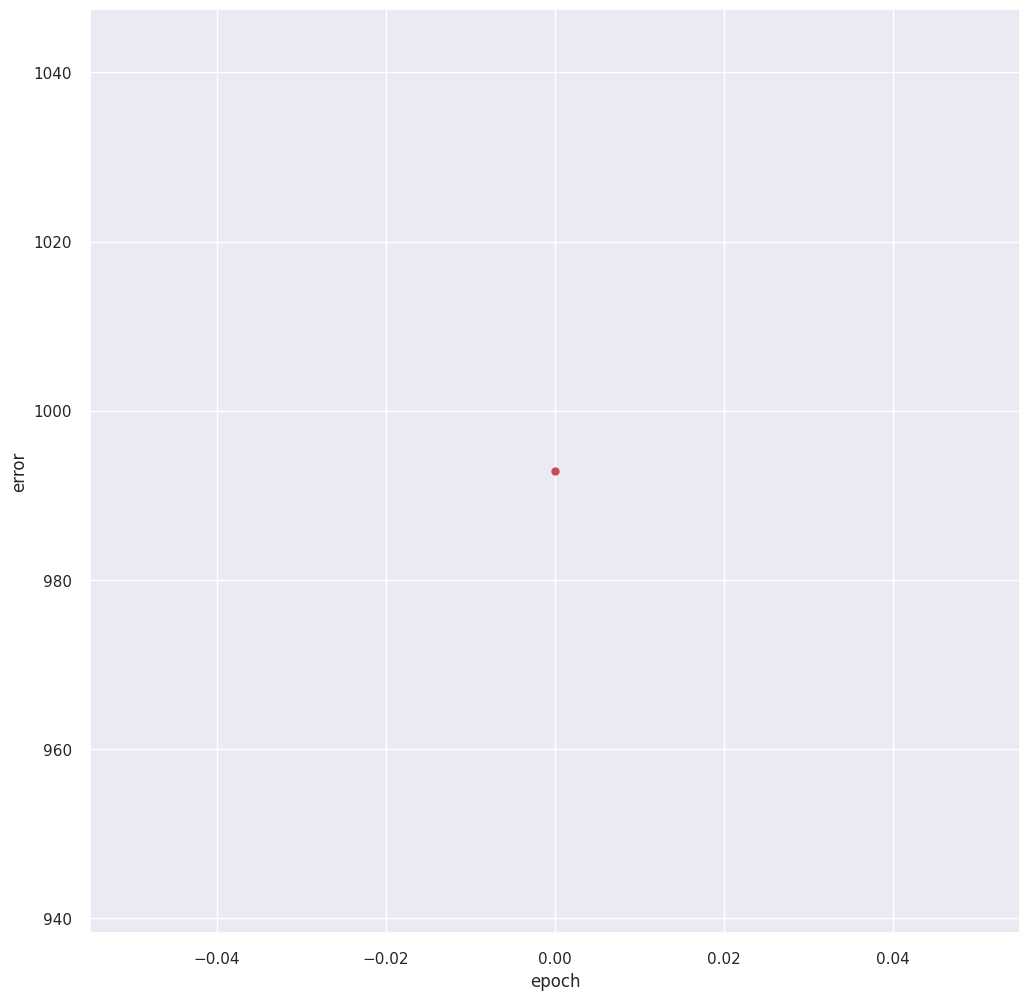

Plotting results


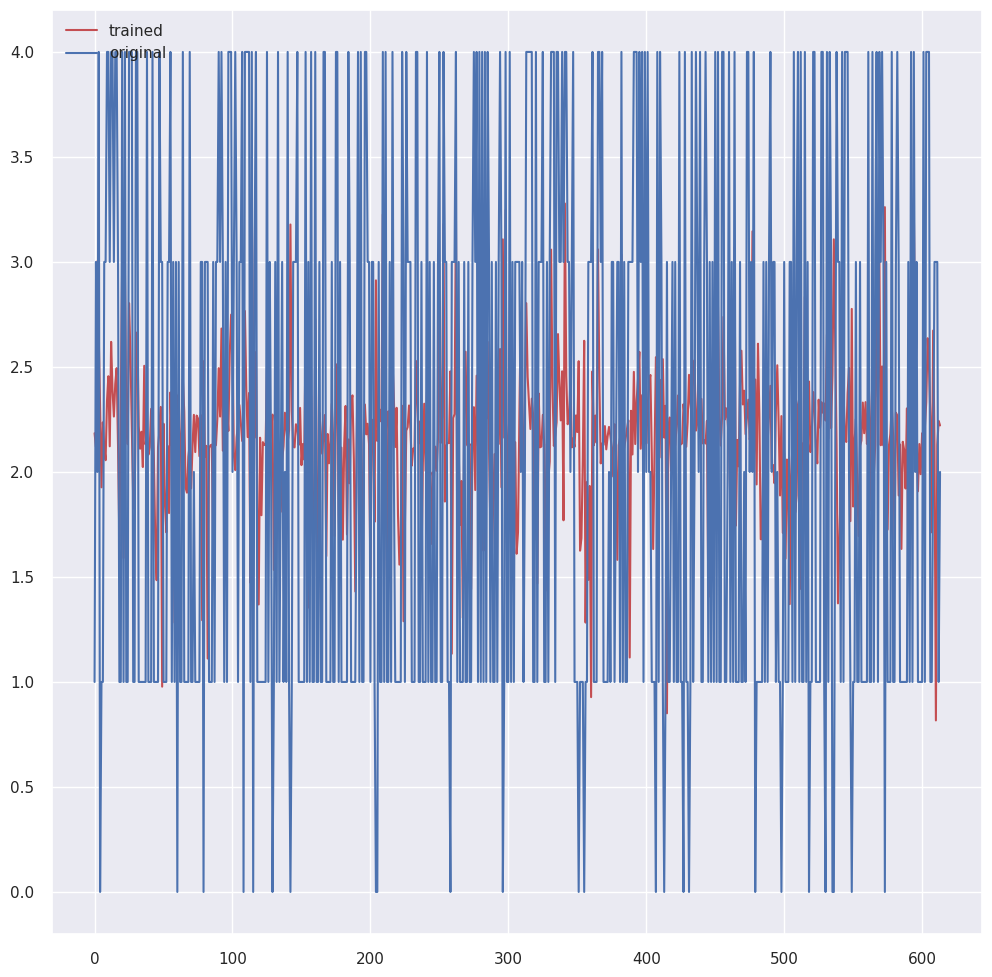

In [ ]:
print("Plotting errors") # Modelin eğitimi sırasında oluşan hataları grafik olarak çizer.
anf.plotErrors()
print("Plotting results") # Modelin tahminlerini ve gerçek değerleri grafik olarak çizer.
anf.plotResults()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(train_y, predictions), mean_squared_error(train_y, predictions)

(1.1734162795145953, 1.6171917802037301)

eğitim verileri üzerinde ortalama 0.95 birimlik bir mutlak hata ve ortalama 1.31 birimlik bir karesel hata




---





##    **LVQ**




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
df_lvq =df.copy()

In [ ]:
class LVQClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.0001, epochs=500, prototype_per_class=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.prototype_per_class = prototype_per_class

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.prototype_labels, self.prototypes = self.initialize_prototypes(X, y)
        for epoch in range(self.epochs):
            for i, x in enumerate(X):
                closest_prototype_index = self.find_closest_prototype_index(x)
                if y[i] == self.prototype_labels[closest_prototype_index]:
                    self.prototypes[closest_prototype_index] += self.learning_rate * (x - self.prototypes[closest_prototype_index])
                else:
                    self.prototypes[closest_prototype_index] -= self.learning_rate * (x - self.prototypes[closest_prototype_index])
        self.is_fitted_ = True
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        y_pred = []
        for x in X:
            closest_prototype_index = self.find_closest_prototype_index(x)
            y_pred.append(self.prototype_labels[closest_prototype_index])
        return np.array(y_pred)

    def initialize_prototypes(self, X, y):
        prototype_labels = np.unique(y)
        prototypes = []
        for label in prototype_labels:
            label_indices = np.where(y == label)[0]
            np.random.shuffle(label_indices)
            label_indices = label_indices[:self.prototype_per_class]
            prototypes.extend(X[label_indices])
        return prototype_labels, np.array(prototypes)

    def find_closest_prototype_index(self, x):
        distances = np.linalg.norm(self.prototypes - x, axis=1)
        return np.argmin(distances)

In [ ]:
y = df_lvq["OUTCOME"]
X = df_lvq.drop("OUTCOME", axis=1)

X_train, X_test, train_y, test_y = train_test_split(df_lvq, labels, test_size=0.30, random_state=42, stratify=labels)


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lvq', LVQClassifier())
])

pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('lvq', LVQClassifier())])

In [ ]:
"""
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
"""

'\nX_train = X_train.to_numpy()\ny_train = y_train.to_numpy()\n\nX_test = X_test.to_numpy()\ny_test = y_test.to_numpy()\n'

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77       150
           1       0.40      0.07      0.12        81

    accuracy                           0.64       231
   macro avg       0.53      0.51      0.45       231
weighted avg       0.56      0.64      0.54       231





---

## **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import LSTM, Dropout, Dense

In [ ]:
df_lstm =df.copy()

In [ ]:
y = df_lstm["OUTCOME"]
X = df_lstm.drop("OUTCOME", axis=1)

X_train, X_test, train_y, test_y = train_test_split(df_lstm, labels, test_size=0.20, random_state=42, stratify=labels)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
20/20 [==============================] - 4s 29ms/step - loss: 0.6892 - accuracy: 0.6352 - val_loss: 0.6825 - val_accuracy: 0.6623
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6739 - accuracy: 0.7199 - val_loss: 0.6603 - val_accuracy: 0.7468
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6371 - accuracy: 0.7231 - val_loss: 0.6047 - val_accuracy: 0.7597
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.7524 - val_loss: 0.5201 - val_accuracy: 0.7727
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4815 - accuracy: 0.7606 - val_loss: 0.5003 - val_accuracy: 0.7403
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4663 - accuracy: 0.7687 - val_loss: 0.4998 - val_accuracy: 0.7403
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7687 - val_loss: 0.4900 - val_accuracy: 0.7532
Epoch 8/50
20/20 [=

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

5/5 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix:
 [[78 21]
 [17 38]]


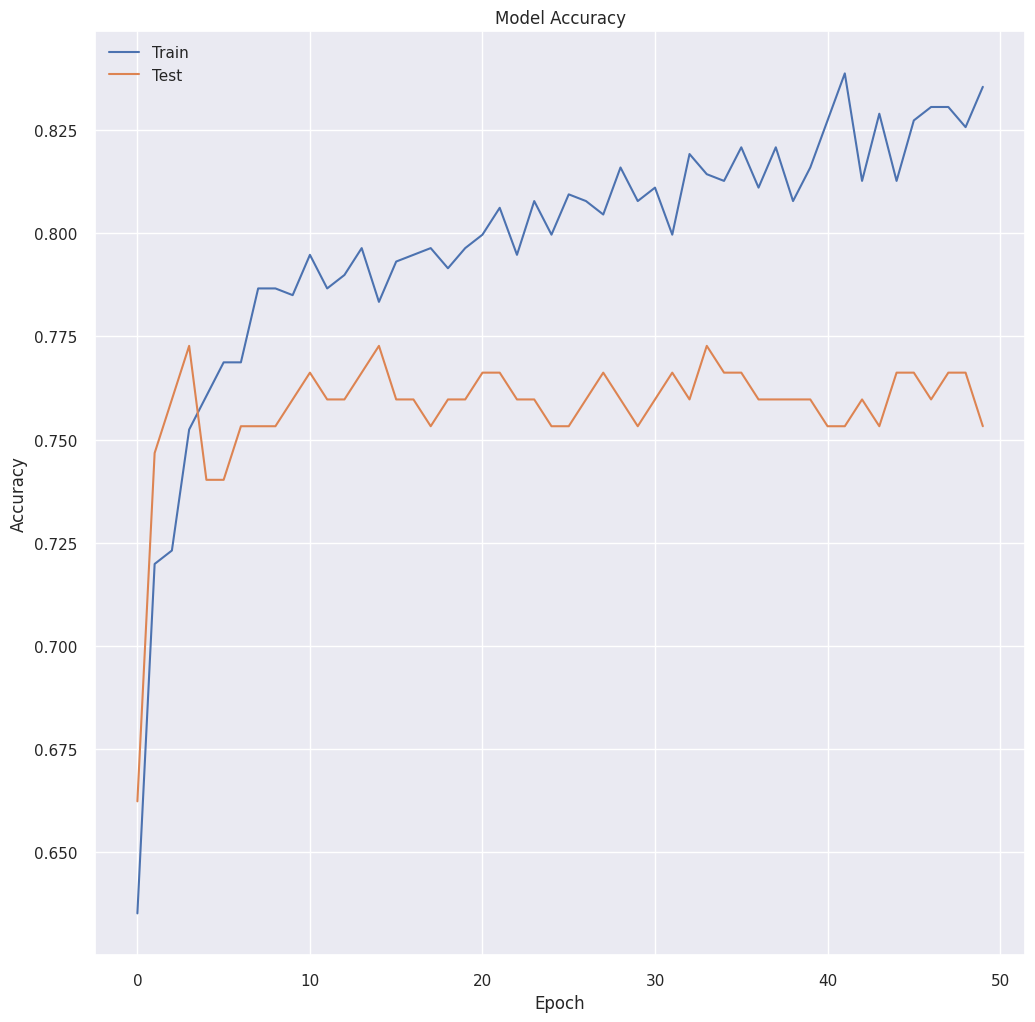

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()